In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

def getXY(name:str, T=-1):
    if T == -1:
        T = np.inf
    with open(name, 'r') as file:
        lines = file.readlines()
    ts = []
    fs = []
    for i in range(len(lines)):
        sentence = lines[i]
        if i % 2 == 0:
            if int(sentence) > T:
                break
            ts.append(int(sentence))
        else:
            fs.append(float(sentence.split()[0].strip("[")))  # '[70.47        2.95153658]'
    x_num = -6
    for i in range(0, len(ts)):
        if ts[i] > ts[i+1]:
            x_num = i + 1  # +1是因为数组从零开始
            break

    X = np.array(ts[:x_num])
    Y = np.zeros(len(X))
    times = 0
    for i in range((len(fs)//x_num) * x_num):
        if i % x_num == 0:
            times += 1
        Y[i % x_num] += fs[i]
    Y /= times
    # print(Y[-1])
    return X, Y

In [2]:
def getFinalInfo(name:str, T=-1):
    if T == -1:
        T = np.inf
    with open(name, 'r') as file:
        lines = file.readlines()
    ts = []
    fs = []
    for i in range(len(lines)):
        sentence = lines[i]
        if i % 2 == 0:
            if int(sentence) > T:
                break
            ts.append(int(sentence))
        else:
            fs.append(float(sentence.split()[0].strip("[")))  # '[70.47        2.95153658]'
    x_num = -6 # !! 每次运行的打印次数 !!
    for i in range(0, len(ts)):
        if ts[i] > ts[i+1]:
            x_num = i + 1  # +1是因为数组从零开始
            break
    finals = []
    for i in range((len(fs)//x_num) * x_num):
        if (i + 1) % x_num == 0:  # 每次运行的最后一行打印
            finals.append(fs[i])
    print(finals)
    return finals


In [3]:
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'black', 'grey']
file_colors = dict()
ci = 0
for file_name in os.listdir('D:/42/Final/Code_Project/EA_submodular/Z画图/'
                            'InfMax'):
    if file_name == '0画.ipynb': continue
    file_colors[file_name] = colors[ci]
    ci += 1
print(file_colors)


{'10meanOutD_final.py_result.txt': 'red', 'meanOutD_final.py_result.txt': 'orange', 'OutD_final.py_result.txt': 'yellow', '非支配排序_然后按Hamm.py_result.txt': 'green'}


[22.7908, 22.8795, 22.1899, 22.4672, 23.051, 22.9829, 22.6288, 23.0007, 22.7465, 23.6771, 23.171, 23.438, 23.0546, 23.5044, 22.6442, 23.4689, 22.4129, 23.5106, 23.4197, 23.4788]
[23.4501, 23.469, 23.268, 23.506, 22.8036, 22.7581, 21.8852, 22.1826, 22.5958, 22.7763, 23.6772, 21.9861, 23.5609, 22.0066, 22.5687, 22.5376, 21.5324, 22.456, 22.831, 21.9953]
[23.256, 22.6201, 23.417, 22.988, 22.577, 23.6836, 23.6041, 22.999, 23.5392, 23.0749, 23.1285, 23.555, 22.7954, 22.8762, 23.5054, 20.5002, 22.2927, 23.5193, 20.2441, 22.4465]
[23.1409, 22.8684, 23.0879, 23.055, 22.8734, 23.3039, 23.3799, 22.8293, 22.4935, 23.0713, 22.73, 22.9413, 22.7713, 22.9365, 22.2351, 22.5489, 22.7153, 22.8664, 23.5157, 23.442]
10meanOutD_final.py 23.025875 +- 0.4282267658919928
meanOutD_final.py 22.692325 +- 0.6388398332133024
OutD_final.py 22.831110000000002 +- 0.9369150295124504
非支配排序_然后按Hamm.py 22.9403 +- 0.3245702081214477


C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25903 (\N{CJK UNIFIED IDEOGRAPH-652F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37197 (\N{CJK UNIFIED IDEOGRAPH-914D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25490 (\N{CJK UNIFIED IDEOGRAPH-6392}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  fig.canvas.print_figure(b

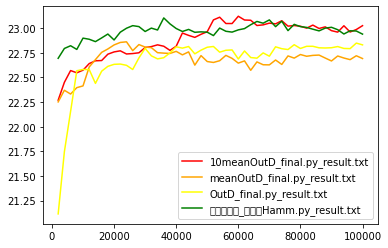

In [4]:
infos = dict()
for fi in file_colors:
    color = file_colors[fi]
    X, Y = getXY(fi)
    plt.plot(X, Y, color, label=fi)
    infos[fi] = getFinalInfo(fi)
for fi in infos:
    print(fi.strip('_result.txt'), np.mean(infos[fi]), '+-', np.std(infos[fi], ddof=1))

# print(Infos)
plt.legend()
plt.show()